In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
## Data Gatharing
dataset = pd.read_csv("heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset.duplicated().sum()

1

In [5]:
dataset[dataset.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
dataset.iloc[[162,163,164],:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
dataset.isna().sum()/len(dataset) * 100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [8]:
## EDA

In [9]:
## keeping backup of the dataset
backup = dataset.copy()

In [10]:
dataset.duplicated().sum()

1

In [11]:
dataset[dataset.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
dataset.drop_duplicates(inplace=True, ignore_index=True)

In [13]:
dataset.duplicated().sum()

0

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


<AxesSubplot: >

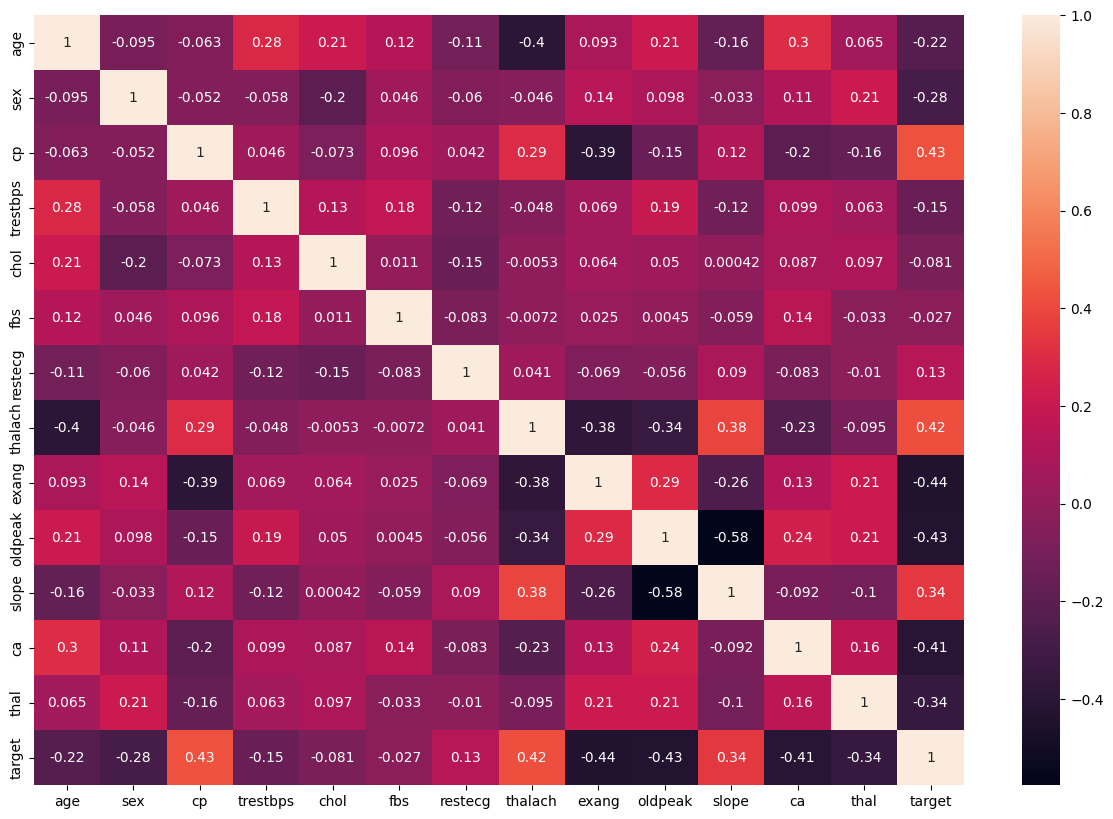

In [15]:
### Correlations
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True)

<AxesSubplot: >

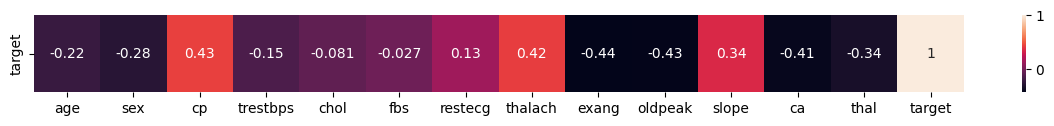

In [16]:
plt.figure(figsize=(15,1))
sns.heatmap(dataset.corr().tail(1), annot=True)

In [17]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
cat_col = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
conti_col = ["age", "trestbps", "chol", "thalach", "oldpeak"] 
target = ["target"]

In [19]:
def Count_Categorical_col(data, column):
    for ind, val in enumerate(column):
        print(val,"\n",(data[val].value_counts()), "\n")
        
Count_Categorical_col(dataset,cat_col)

sex 
 1    206
0     96
Name: sex, dtype: int64 

cp 
 0    143
2     86
1     50
3     23
Name: cp, dtype: int64 

fbs 
 0    257
1     45
Name: fbs, dtype: int64 

restecg 
 1    151
0    147
2      4
Name: restecg, dtype: int64 

exang 
 0    203
1     99
Name: exang, dtype: int64 

slope 
 2    141
1    140
0     21
Name: slope, dtype: int64 

ca 
 0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64 

thal 
 2    165
3    117
1     18
0      2
Name: thal, dtype: int64 



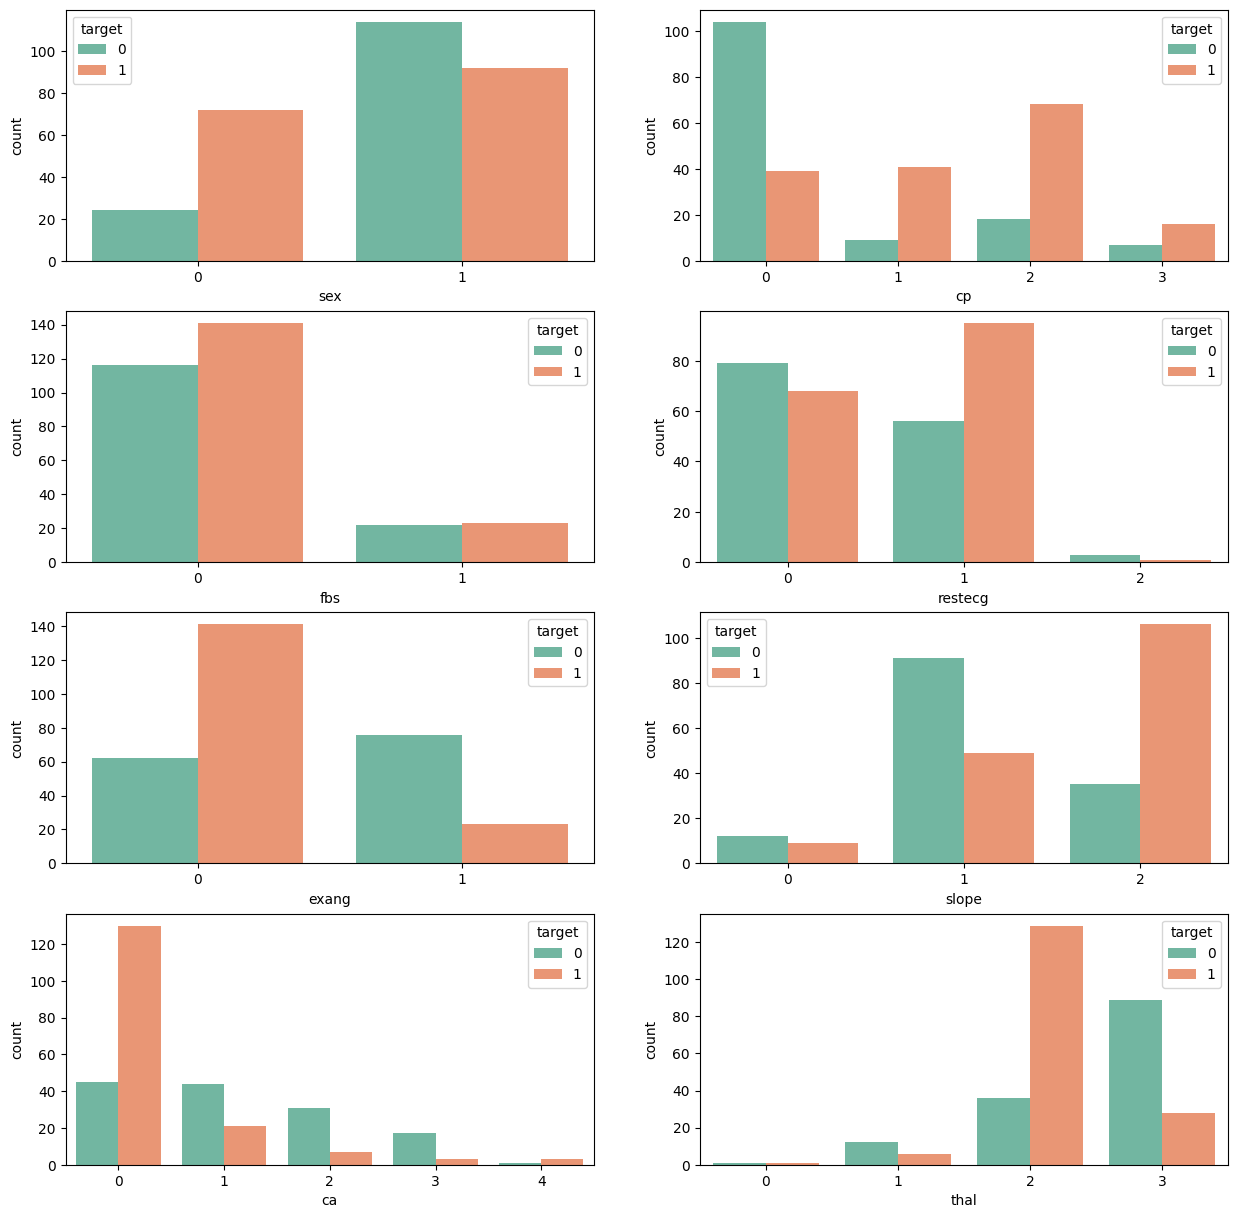

In [20]:
## count plots
plt.figure(figsize=(15,15))
for i in range(8):
    plt.subplot(4,2,i+1)
    sns.countplot(data=dataset, x=cat_col[i], hue="target", palette='Set2')

In [21]:
len(conti_col)

5

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'trestbps'}>,
        <AxesSubplot: title={'center': 'chol'}>],
       [<AxesSubplot: title={'center': 'thalach'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

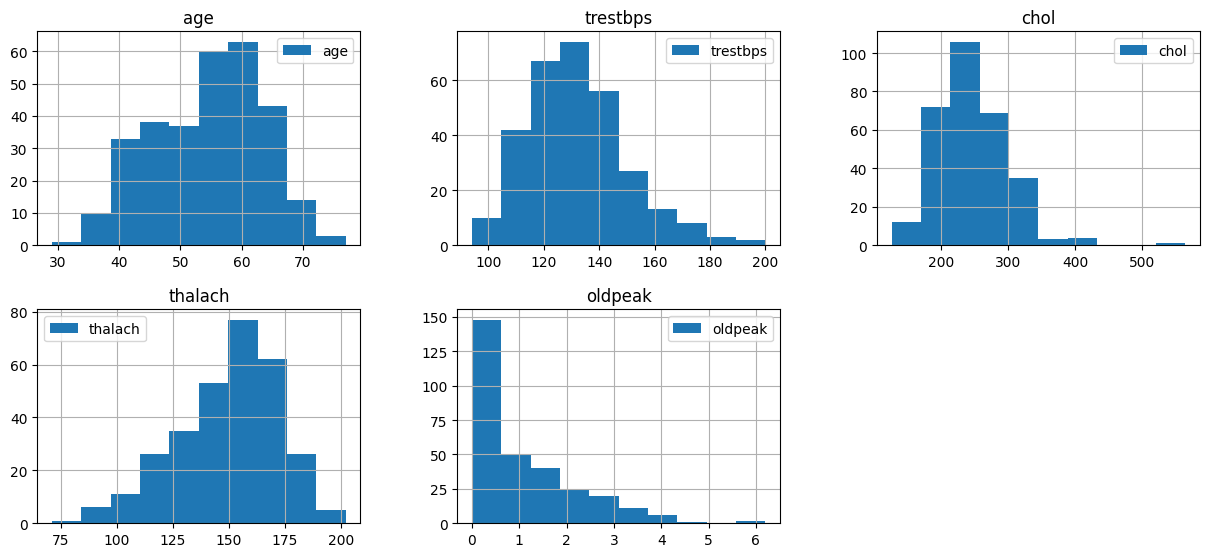

In [22]:
## normal distribution
dataset.hist(column=conti_col,figsize=(15,10),layout=(3,3), legend=True)

In [23]:
dataset.skew()

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

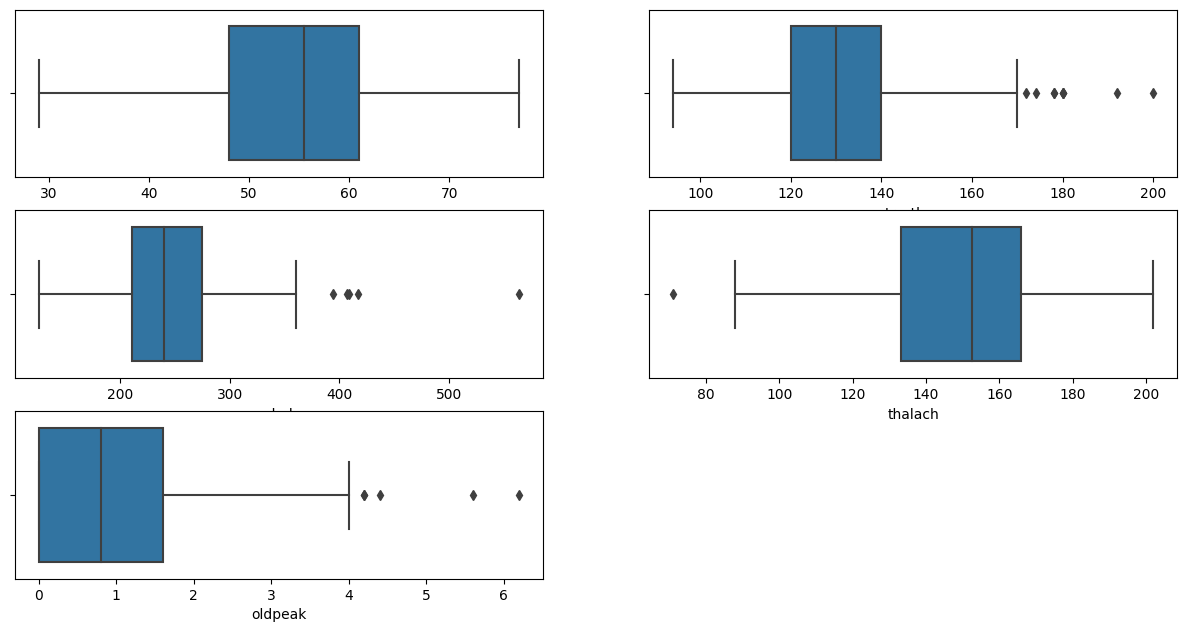

In [24]:
## check for outliers
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=dataset, x=conti_col[i], hue="target")

age            AxesSubplot(0.125,0.747241;0.133621x0.132759)
sex         AxesSubplot(0.285345,0.747241;0.133621x0.132759)
cp           AxesSubplot(0.44569,0.747241;0.133621x0.132759)
trestbps    AxesSubplot(0.606034,0.747241;0.133621x0.132759)
chol        AxesSubplot(0.766379,0.747241;0.133621x0.132759)
fbs            AxesSubplot(0.125,0.587931;0.133621x0.132759)
restecg     AxesSubplot(0.285345,0.587931;0.133621x0.132759)
thalach      AxesSubplot(0.44569,0.587931;0.133621x0.132759)
exang       AxesSubplot(0.606034,0.587931;0.133621x0.132759)
oldpeak     AxesSubplot(0.766379,0.587931;0.133621x0.132759)
slope          AxesSubplot(0.125,0.428621;0.133621x0.132759)
ca          AxesSubplot(0.285345,0.428621;0.133621x0.132759)
thal         AxesSubplot(0.44569,0.428621;0.133621x0.132759)
target      AxesSubplot(0.606034,0.428621;0.133621x0.132759)
dtype: object

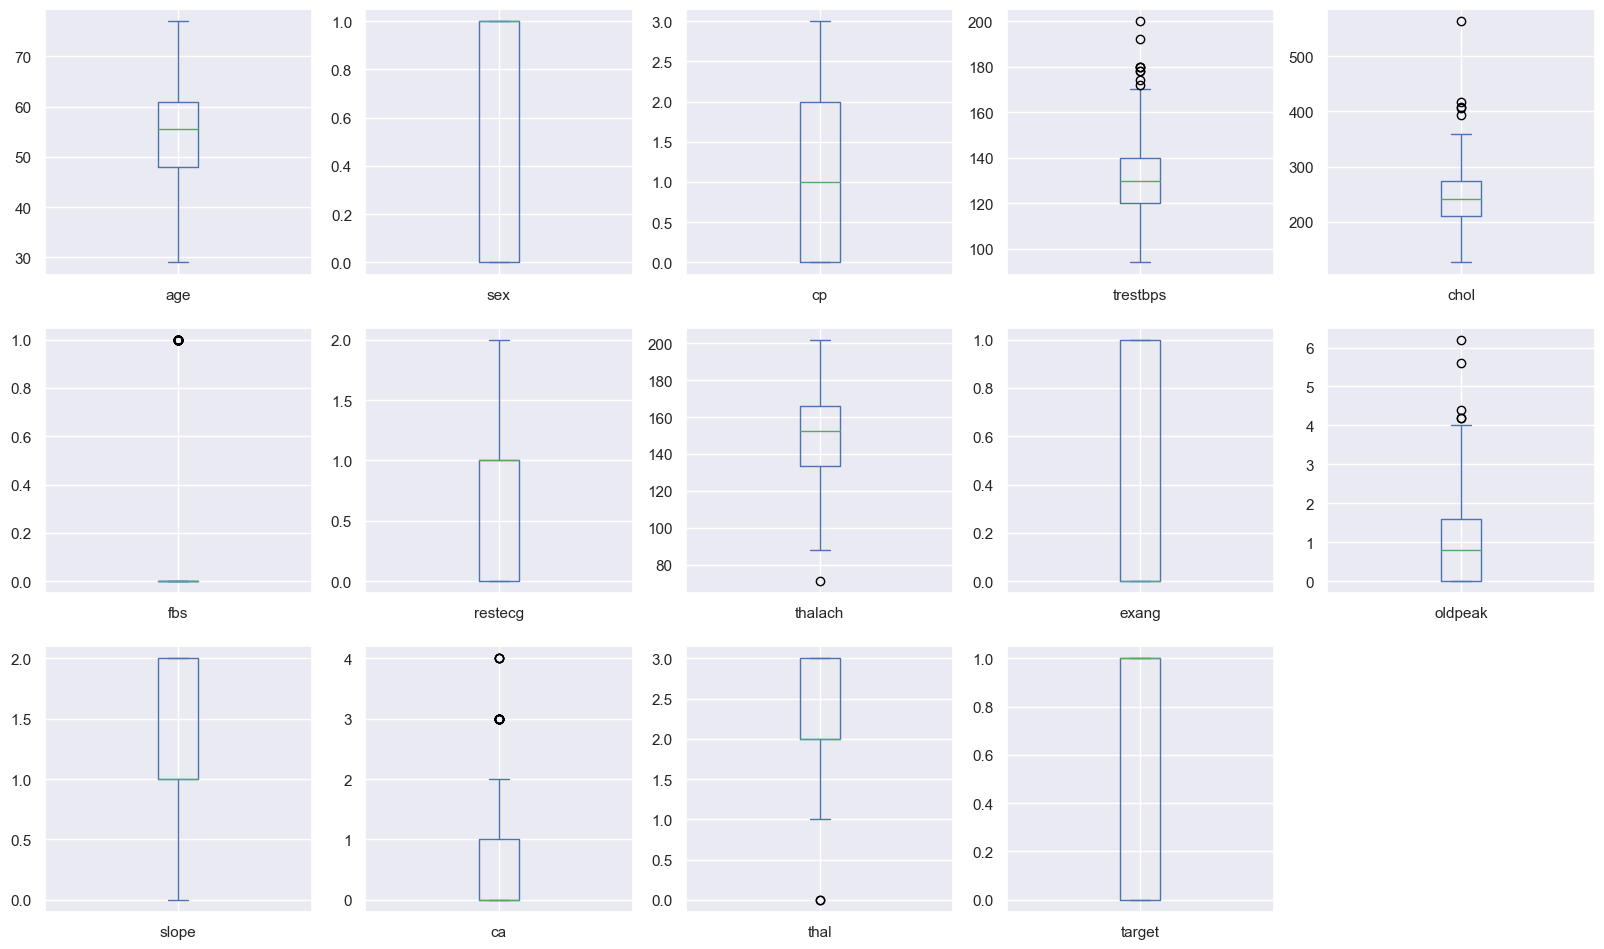

In [31]:
sns.set_theme(color_codes=True)
dataset.plot(kind="box", subplots =True, layout=(5,5), figsize=(20,20))

In [36]:
dataset.shape

(302, 14)

### Model Training

In [35]:
X = dataset.drop("target", axis=1)
y = dataset["target"]

In [46]:
## spliting data

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)

In [47]:
lg = LogisticRegression()
lg.fit(x_test, y_test)

LogisticRegression()

In [48]:
accuries = []
for i in range(1000):
    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)
    lg = LogisticRegression()
    lg.fit(x_test, y_test)
    sc = lg.score(x_test,y_test)
    accuries.append(sc)


In [49]:
print(f"maximumn score is {np.max(accuries)} at randome state = {np.argmax(accuries)}")
print("*"*100)
print(f"minimum score is {np.min(accuries)} at randome state = {np.argmin(accuries)}")

maximumn score is 0.9836065573770492 at randome state = 8
****************************************************************************************************
minimum score is 0.7540983606557377 at randome state = 168


In [50]:
lg.score(x_test,y_test)

0.9672131147540983

In [51]:
lg.score(X_train,y_train)

0.8132780082987552

In [57]:
y_pred = lg.predict(x_test)
y_train_pred = lg.predict(X_train)

y_pred[:10]

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [58]:
y_test[:10]

289    0
137    1
233    0
207    0
175    0
2      1
267    0
44     1
138    1
108    1
Name: target, dtype: int64

## Classification report

In [64]:
clf = classification_report(y_train,y_train_pred)
print(f"Training Report:-\n{clf}")
print("*"*100)
clf = classification_report(y_test,y_pred)
print(f"Testing Report:\n{clf}")

Training Report:-
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       110
           1       0.80      0.88      0.84       131

    accuracy                           0.81       241
   macro avg       0.82      0.81      0.81       241
weighted avg       0.82      0.81      0.81       241

****************************************************************************************************
Testing Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.94      1.00      0.97        33

    accuracy                           0.97        61
   macro avg       0.97      0.96      0.97        61
weighted avg       0.97      0.97      0.97        61



### confusion matrix

In [79]:
# for testing
confusion_matrix(y_test, y_pred)

array([[26,  2],
       [ 0, 33]], dtype=int64)

In [80]:
# for training
confusion_matrix(y_train, y_train_pred)

array([[ 81,  29],
       [ 16, 115]], dtype=int64)

### Roc Auc curve

In [78]:
y_prob = lg.predict_proba(x_test)
y_prob_tr = lg.predict_proba(X_train)

In [77]:
y_prob[:,1]

array([3.44953479e-01, 8.84434209e-01, 3.12754050e-03, 2.99610847e-02,
       4.35363489e-02, 8.36972480e-01, 2.81505904e-03, 9.54673275e-01,
       6.54540871e-01, 9.42408461e-01, 3.26015377e-02, 8.57752494e-01,
       5.80054840e-01, 1.80306205e-01, 9.93490522e-01, 9.59503384e-01,
       9.25938881e-01, 8.37597545e-01, 9.17853751e-01, 9.61742322e-01,
       4.70969448e-01, 1.92203520e-03, 9.60156799e-01, 9.14669531e-01,
       2.75638923e-01, 2.60039856e-03, 6.91474581e-01, 1.49674945e-02,
       6.17901639e-02, 8.06500627e-01, 9.29984490e-01, 3.84548764e-01,
       6.56678903e-01, 7.69211410e-01, 8.86069193e-02, 9.19243418e-01,
       7.70911145e-01, 1.35796436e-01, 9.16252115e-01, 4.47903625e-02,
       9.94318990e-01, 7.43010404e-01, 2.20642376e-02, 9.41656995e-01,
       5.65331165e-03, 4.45070459e-03, 1.11415247e-01, 9.82129114e-01,
       5.84485303e-02, 9.45756989e-01, 9.08969115e-01, 4.09245757e-01,
       3.06623447e-04, 8.35226845e-01, 7.91927959e-01, 9.18767172e-02,
      

In [101]:
fpr,tpr,thre = roc_curve(y_test, y_prob[:,1])
fpr1,tpr1,thre1 = roc_curve(y_train, y_prob_tr[:,1])

In [87]:
print(f"FPR \n {fpr}\n")
print(f"TPR \n{fpr}\n")
print(f"Threshold \n{thre}")

FPR 
 [0.         0.         0.         0.03571429 0.03571429 0.07142857
 0.07142857 1.        ]

TPR 
[0.         0.         0.         0.03571429 0.03571429 0.07142857
 0.07142857 1.        ]

Threshold 
[1.99431899e+00 9.94318990e-01 9.60156799e-01 9.59503384e-01
 6.91474581e-01 6.56678903e-01 5.47224136e-01 3.06623447e-04]


Text(0, 0.5, 'True Positive Rate (sensitivity)')

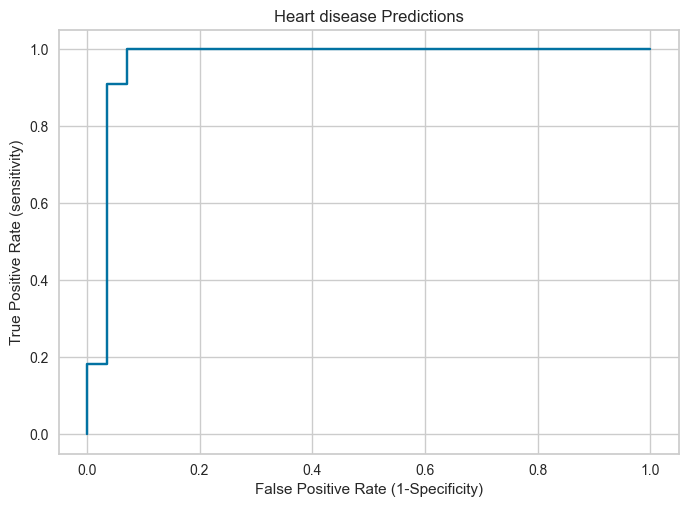

In [103]:
## testing data
plt.plot(fpr,tpr)
plt.title("Heart disease Predictions")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (sensitivity)")

Text(0, 0.5, 'True Positive Rate (sensitivity)')

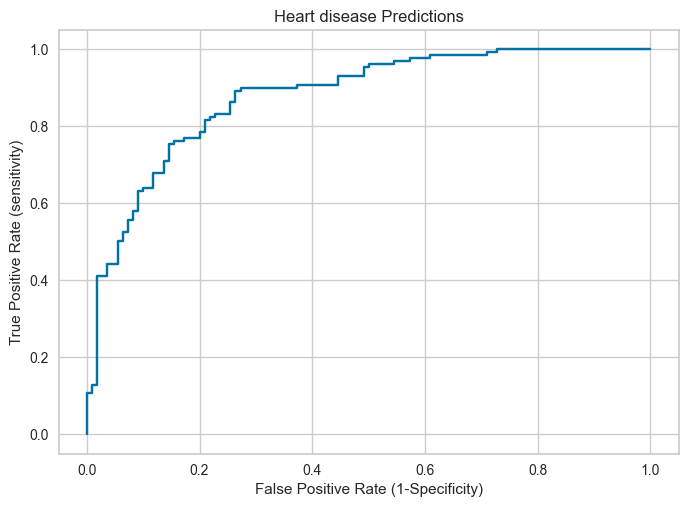

In [104]:
## Training data
plt.plot(fpr1,tpr1)
plt.title("Heart disease Predictions")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (sensitivity)")

In [99]:
# !pip install yellowbrick 

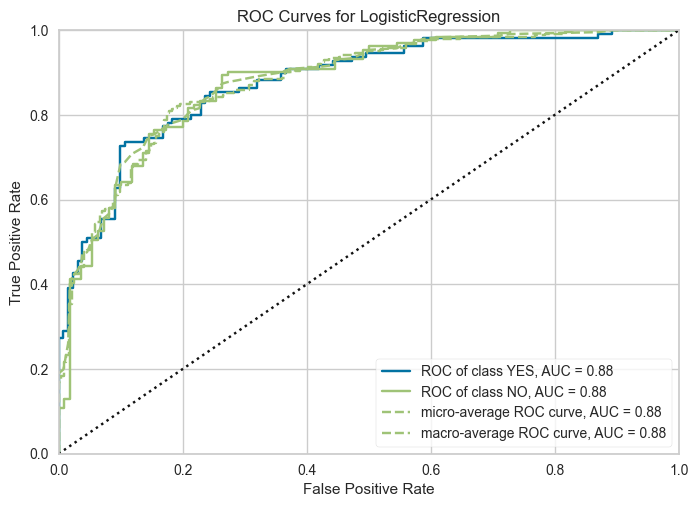

<AxesSubplot: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [98]:
from yellowbrick import ROCAUC

vis = ROCAUC(lg, classes=["YES","NO"])
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()    

In [111]:
dataset.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [110]:
age, sex, cp, trestbps, chol, fbs, restecg, thalach,exang, oldpeak, slope, ca, thal = dataset.columns[:-1]

## Predicting heart disease

In [113]:
def predict(age, sex, cp, trestbps, chol, fbs, restecg, thalach,exang, oldpeak, slope, ca, thal):
    pred = lg.predict([[age, sex, cp, trestbps, chol, fbs, restecg, 
                 thalach,exang, oldpeak, slope, ca, thal]])
    return pred[0]

predict(63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1)

1

In [115]:
import pickle
pickle.dump(lg, open("Model.pkl", "wb"))